In [1]:
import numpy as np
import sys
sys.path.insert(0, 'base')

%load_ext autoreload
%autoreload 2

from planet_ruler import LimbObservation

In [2]:
from abcpy.backends import BackendSpark
import pyspark
sc = pyspark.SparkContext()
sc.addPyFile('utils/geometry.py')
sc.addPyFile('utils/fit.py')
sc.addPyFile('base/planet_ruler.py')

backend = BackendSpark(sc, parallelism=4)

22/05/08 16:50:27 WARN Utils: Your hostname, Mac-mini.local resolves to a loopback address: 127.0.0.1; using 192.168.0.16 instead (on interface en1)
22/05/08 16:50:27 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/08 16:50:27 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
Obs = LimbObservation('demo/saturn_pia21341-1041.jpg')

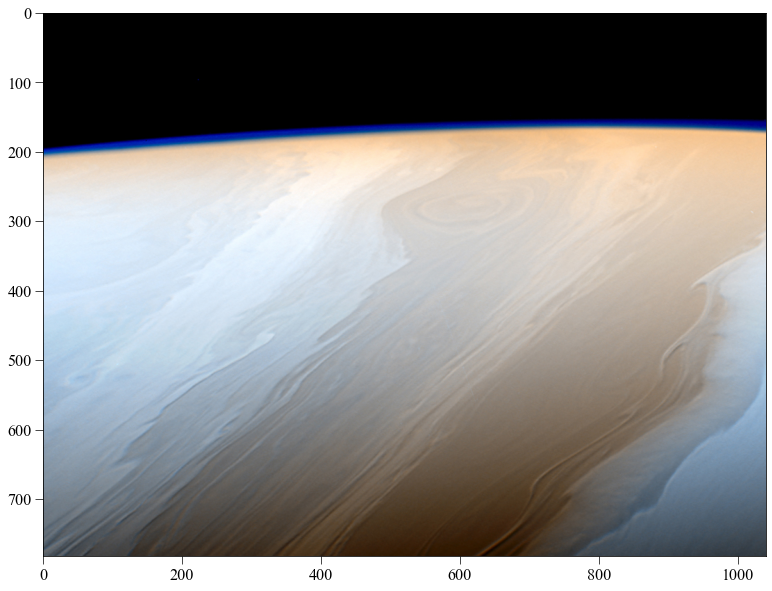

In [4]:
Obs.plot(gradient=False)

In [5]:
Obs.restrict_image(xmin=200, ymin=100, ymax=200)

In [6]:
Obs.detect_limb(window_length=31, polyorder=1, deriv=0)

/Users/banderson/Projects/bogs/planet-ruler/utils/image.py:19: RuntimeWarning: divide by zero encountered in log10
  grad = np.log10(grad)


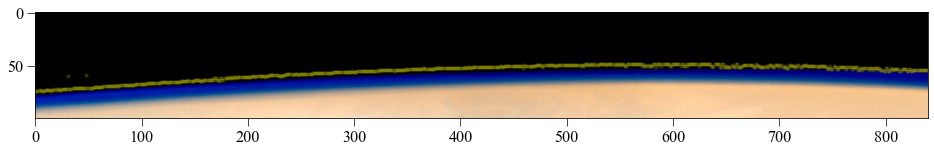

In [7]:
Obs.plot(gradient=False)

In [8]:
Obs.smooth_limb(method='moving-mean', window_length=100, polyorder=2)

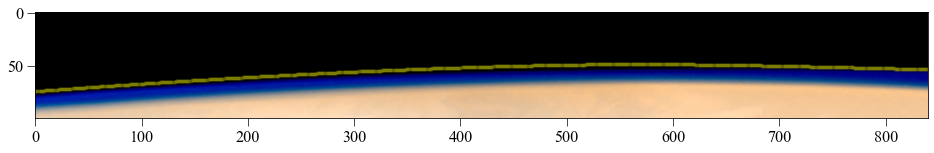

In [9]:
Obs.plot(gradient=False)

In [10]:
Obs.parameter_limits['r'] = [1e7, 1e9]
Obs.parameter_limits['h'] = [1.1e6, 1.3e6]
Obs.parameter_limits['f'] = [2.001, 2.003]
Obs.parameter_limits['x0'] = [-1, 1]
Obs.parameter_limits['y0'] = [-1, 1]
Obs.parameter_limits['origin_x'] = [-1.5e6, 1.5e6]
Obs.parameter_limits['origin_y'] = [-1.5e6, 1.5e6]
Obs.parameter_limits['origin_z'] = [-1.5e6, 1.5e6]

In [11]:
Obs.init_parameter_values['r'] = 60268*1000
Obs.init_parameter_values['h'] = 1.2e6
Obs.init_parameter_values['f'] = 2.00270

In [12]:
Obs.parameter_priors['r']['std'] = 1000000
Obs.parameter_priors['f']['std'] = 0.001
Obs.parameter_priors['h']['std'] = 1e4
Obs.parameter_priors['origin_y']['lower'] = 0
Obs.parameter_priors['origin_y']['upper'] = 2 * np.sqrt(Obs.init_parameter_values['h']**2 + 
                                                        2 * Obs.init_parameter_values['h'] * 
                                                        Obs.init_parameter_values['r'])

In [13]:
Obs.fit_limb(method='oneshot')

fitting oneshot...


In [14]:
# Obs.fit_limb(backend=backend, method='oneshot')

In [28]:
Obs.fit_limb(backend=backend, method='abc-multifit', epsilon=1000000, n_samples=4)

TypeError: __init__() missing 2 required positional arguments: 'free_parameters' and 'init_parameter_values'

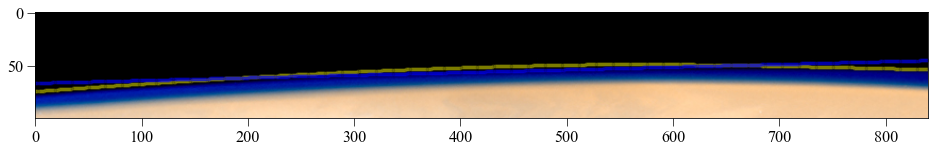

In [16]:
Obs.plot(gradient=False)

In [17]:
# import matplotlib.pyplot as plt
# import numpy as np

In [18]:
# y = Obs.features['limb']
# plt.plot(np.arange(len(y)), y, c='k')
# for params in Obs.fit.accepted:
#     y = Obs.fit.forward_simulate(list(params.values()), 1)[0][0]
#     plt.plot(np.arange(len(y)), y)
# plt.show()